# Sexually Transmitted Diseases and Public Education
----------------------------------------------------

## Exploring the trends in reported STIs in the US, and State Sex Education Requirements
### Selena Flannery - November 18, 2016

This Notebook is intended to explore the various correlations between a number of demographic factors and the std rates in the United States.

I initially began this project as a result of my passion in both public health and education, with the intent of exploring the relation between Sexually Transmitted Diseases and Sex Education in the US, and through the project I became fascinated by the other demographic data available.

Throughout this notebook, I will be exploring the various comparisons across Gender, Age, Time, Education Availability, Education Requirements, and Region


The data available in this notebook is sourced through the CDC and the Guttmacher Institution.
    - [CDC: Sexually Transmitted Disease Morbidity, 1984-2014(https://wonder.cdc.gov/std.html)
    - [CDC: Sexually Transmitted Diseases](https://www.cdc.gov/std/)
    - [Guttmacher Institution: Sex and HIV Education Policy](https://www.guttmacher.org/state-policy/explore/sex-and-hiv-education)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("data/us_std_1984_2014.csv", na_values="Not Applicable")
data.Gender = data["Gender Code"]
data.drop(['Year Code', 'Gender Code', 'Notes'], axis=1, inplace=True)
data.replace("Not Applicable", np.nan)
data.Rate = pd.to_numeric(data.Rate, errors='coerce')
data.dropna(subset=["State Code", "Year", "Count", "Population", "Rate"], inplace=True)
data.columns

Index(['State', 'State Code', 'Disease', 'Disease Code', 'Gender', 'Year',
       'Count', 'Population', 'Rate'],
      dtype='object')

## What type of data do we have?

In [3]:
print("Columns:\n\n{}".format("\n".join(data.columns)))

Columns:

State
State Code
Disease
Disease Code
Gender
Year
Count
Population
Rate


In [4]:
print("Categories of Diseases Disclosed:\n\n{}".format("\n".join(data.Disease.unique())))

Categories of Diseases Disclosed:

Chancroid
Chlamydia
Gonorrhea
Total Syphilis
Primary and Secondary Syphilis
Primary Syphilis
Secondary Syphilis
Early Latent Syphilis
Late and Late Latent Syphilis
Congenital Syphilis


They provide information on all types of Syphilis? Are these values represented twice in our data?

In [5]:
d = data.groupby(['Disease'], as_index=False)['Count'].sum()
total = d[d.Disease == "Total Syphilis"].Count.sum()
sum_of_secondary = d[(d.Disease != "Total Syphilis") & (d.Disease.str.contains("Syphilis"))].Count.sum()

total, sum_of_secondary

(1945049.0, 2548683.0)

In [6]:
data[data.State == "Washington"].groupby(['Year', 'Disease'])['Count'].sum()

Year    Disease                       
1984.0  Early Latent Syphilis                70.0
        Gonorrhea                          9159.0
        Late and Late Latent Syphilis       241.0
        Primary Syphilis                     73.0
        Primary and Secondary Syphilis      159.0
        Secondary Syphilis                   86.0
        Total Syphilis                      470.0
1985.0  Chlamydia                          1546.0
        Congenital Syphilis                   1.0
        Early Latent Syphilis                60.0
        Gonorrhea                         10073.0
        Late and Late Latent Syphilis       205.0
        Primary Syphilis                     53.0
        Primary and Secondary Syphilis      115.0
        Secondary Syphilis                   62.0
        Total Syphilis                      381.0
1986.0  Chancroid                             1.0
        Early Latent Syphilis                99.0
        Gonorrhea                          9848.0
        Lat

As a note for this data set: There are categories indicating each stage of Syphilis, as well as a category totalling all cases. Not all states report each stage.

## Total and Rate of Reports Over Time

### Total Count over time

In [7]:
x = "Year"
y = "Count"

In [8]:
regress = LinearRegression()
regress.fit(data[x].reshape(-1, 1), data[y])

/Users/seleniumk/.virtualenvs/data_analysis/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

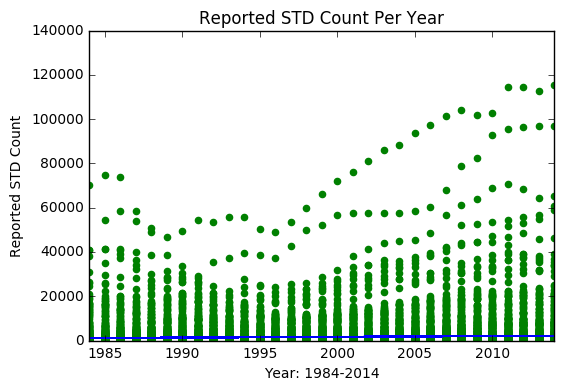

In [9]:
plt.scatter(data[x], data[y], color="green")
plt.plot(data[x], regress.predict(data[x].reshape(-1, 1)))
plt.title("Reported STD Count Per Year")
plt.xlabel("Year: 1984-2014")
plt.ylabel("Reported STD Count")
plt.xlim(1984, 2014)
plt.ylim(0, 140000)
plt.show()

The above graph represents the counts of reported STDs across a number of categories - Disease, Gender and Region

While there is clearly three specific counts that stand out, it generally seems that the count roughly decreased until the mid nineties, and has drastically increased.

Because this is total count and not relative to population, there is likely to be noise related to population increase.

The plot of the linear regression also suggests that while the range is quite high, the bulk of the reported counts are quite low.

### Rate over Time

In [10]:
x = "Year"
y = "Rate"

In [11]:
# regress = LinearRegression()
# regress.fit(data[x].reshape(-1, 1), data[y])

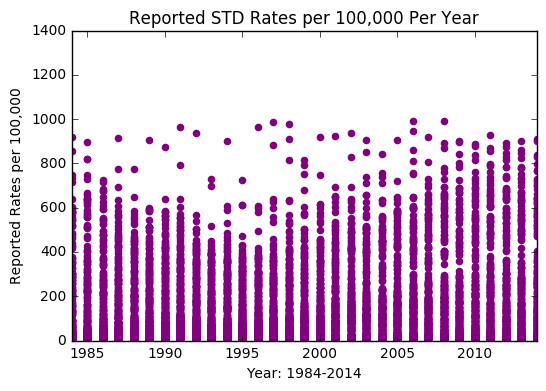

In [12]:
plt.scatter(data[x], data[y], color="purple")
# plt.plot(data[x], regress.predict(data[x].reshape(-1, 1)))
plt.title("Reported STD Rates per 100,000 Per Year")
plt.xlabel("Year: 1984-2014")
plt.ylabel("Reported Rates per 100,000")
plt.xlim(1984, 2014)
plt.ylim(0, 1400)
plt.show()

When looking at rates (rather than count), some of the outliers have disappeared, but the general trend appears the same: a decrease in rates until roughly 1995, and then a steady increase.

I initially plotted the Linear Regression Model on this graph as well, but because it did not offer any apparent direction in trend at this scale.

In [13]:
mean_per_year = data.groupby(['Year'], as_index=False)['Rate'].mean()

In [14]:
regress = LinearRegression()
regress.fit(mean_per_year.Year.reshape(-1, 1), mean_per_year.Rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

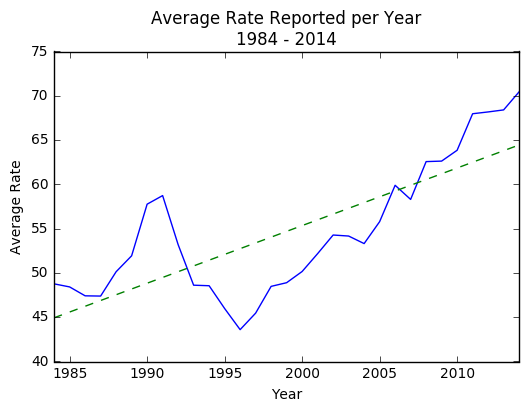

In [15]:

plt.plot(mean_per_year.Year, mean_per_year.Rate)
plt.plot(mean_per_year.Year, regress.predict(mean_per_year.Year.reshape(-1, 1)), linestyle="--")
plt.title("Average Rate Reported per Year\n1984 - 2014")
plt.xlabel("Year")
plt.ylabel("Average Rate")
plt.xlim(1984, 2014)
plt.show()

In [16]:
m = regress.coef_[0]
print("Slope over time: {}".format(m))

Slope over time: 0.6504575516430385


Taking the average of all types of reports per year (these types varied across state, age, and gender) clears the data a bit.

There are three notable trends: 
     Between roughly 1987 and 1990, there was a dramatic increase in the number of reported cases
     Immediately after this, there is a steep decline until roughly 1996.
     In 1996, a steady and dramatic increase began, and continues to trend into the most recent data available
     
Overall, even with the dramatic dip in rates in the mid 90s, rates appear to have been trending upward. About .64 more reports per 100,000 per year 


This is not at all how I anticipated this graph to look.
It was unanticipated that rates would be dramatically increasing, so I will examine either end of this point in time.

In [17]:
mean_per_year_after_1996 = mean_per_year[mean_per_year.Year >= 1996]

In [18]:
regress = LinearRegression()
regress.fit(mean_per_year_after_1996.Year.reshape(-1, 1), mean_per_year_after_1996.Rate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

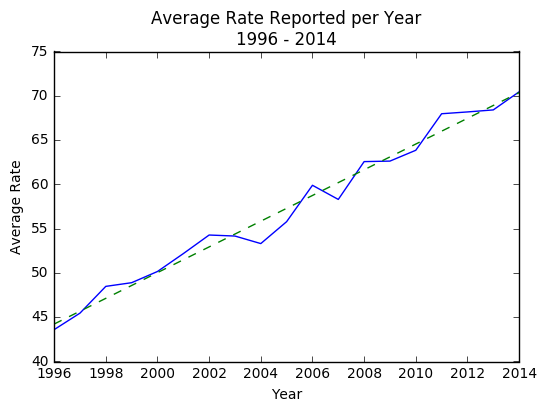

In [19]:
plt.plot(mean_per_year_after_1996.Year, mean_per_year_after_1996.Rate)
plt.plot(mean_per_year_after_1996.Year, regress.predict(mean_per_year_after_1996.Year.reshape(-1, 1)), linestyle="--")
plt.title("Average Rate Reported per Year\n1996 - 2014")
plt.xlabel("Year")
plt.ylabel("Average Rate")
plt.xlim(1996, 2014)
plt.show()

In [20]:
print("Slope over time: {}".format(regress.coef_[0]))

Slope over time: 1.4517687632149385


If we examine the data just post 1995, that rate more than doubles.

## Rates divided by Gender Over Time

### Comparative Rates Categorized by Gender, Over time

In [21]:
gender_mean = data.groupby(['Year', 'Gender'], as_index=False)['Rate'].mean()

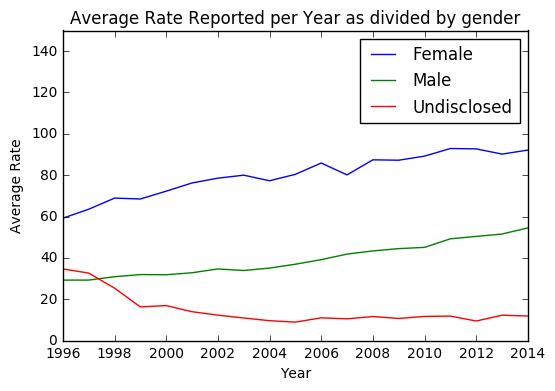

In [22]:
plt.plot(gender_mean.Year.unique(), gender_mean[gender_mean.Gender == "F"].Rate, label="Female")
plt.plot(gender_mean.Year.unique(), gender_mean[gender_mean.Gender == "M"].Rate, label="Male")
plt.plot(gender_mean.Year.unique(), gender_mean[gender_mean.Gender == "U"].Rate, label="Undisclosed")
plt.legend()
plt.title("Average Rate Reported per Year as divided by gender")
plt.xlabel("Year")
plt.ylabel("Average Rate")
plt.xlim(1996, 2014)
plt.ylim(0, 150)
plt.show()

From the graph above, it is clear that the rate of Reported STDs is higher in Females, but what is unclear is whether that change over time varies notably between the two groups.

The category undisclosed is a relatively negligable amount.

### Linear Regression of Rates Categorized by Gender, Over Time

In [23]:
rf = LinearRegression()
rf.fit(gender_mean.Year.unique().reshape(-1, 1), gender_mean[gender_mean.Gender == "F"].Rate)

rm = LinearRegression()
rm.fit(gender_mean.Year.unique().reshape(-1, 1), gender_mean[gender_mean.Gender == "M"].Rate)

ru = LinearRegression()
ru.fit(gender_mean.Year.unique().reshape(-1, 1), gender_mean[gender_mean.Gender == "U"].Rate)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

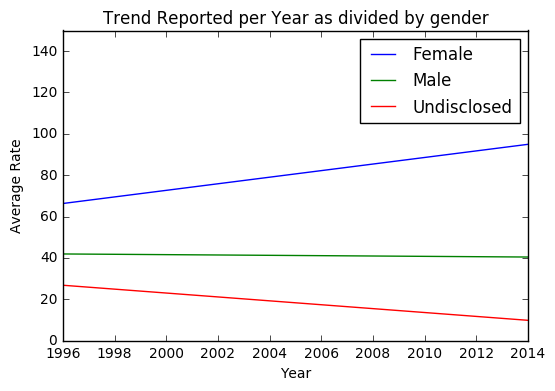

In [24]:
plt.plot(gender_mean.Year.unique(), rf.predict(gender_mean.Year.unique().reshape(-1, 1)), label="Female")
plt.plot(gender_mean.Year.unique(), rm.predict(gender_mean.Year.unique().reshape(-1, 1)), label="Male")
plt.plot(gender_mean.Year.unique(), ru.predict(gender_mean.Year.unique().reshape(-1, 1)), label="Undisclosed")

plt.legend()
plt.title("Trend Reported per Year as divided by gender")
plt.xlabel("Year")
plt.ylabel("Average Rate")
plt.xlim(1996, 2014)
plt.ylim(0, 150)
plt.show()

Here it it appears that the Rates reported in Females are increasing, while there is an almost negligable decrease in reported rates for men, and a slight decrease in reported rates for undisclosed.

In [25]:
print("Slope -- Female: {}".format(rf.coef_[0]))
print("Slope -- Male: {}".format(rm.coef_[0]))
print("Slope -- Undisclosed: {}".format(ru.coef_[0]))

Slope -- Female: 1.5903671054485886
Slope -- Male: -0.0825472024581951
Slope -- Undisclosed: -0.9426426387194186


## Types of Disease

At this point, I'd also like to point out that, for some reason, HIV data is not included in this data set. I am unsure of the implications of this.

### Counts of Categories of Disease Reported

#### Total counts between 1984 and 2014

In [26]:
diseases_c = data.groupby(["Disease", "Disease Code"], as_index=False)["Count"].sum()
diseases_r_mean = data.groupby(["Disease", "Disease Code"], as_index=False)["Rate"].mean()

diseases_r_mean

,Disease,Disease Code,Rate
0,Chancroid,273.0,0.838968
1,Chlamydia,274.0,251.970028
2,Congenital Syphilis,316.0,25.711781
3,Early Latent Syphilis,313.0,7.631624
4,Gonorrhea,280.0,150.997833
5,Late and Late Latent Syphilis,314.0,5.728056
6,Primary Syphilis,311.0,2.705130
7,Primary and Secondary Syphilis,310.0,6.748637
8,Secondary Syphilis,312.0,4.414848
9,Total Syphilis,320.0,19.110278


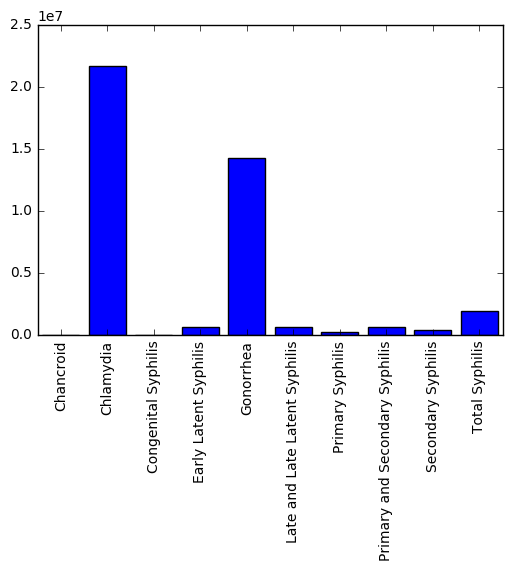

In [27]:
plt.bar(diseases_c.index, diseases_c.Count, align="center")
plt.xticks(diseases_c.index, diseases_c.Disease, rotation="vertical")
plt.xlim(diseases_c.index.min() - .5, diseases_c.index.max() + .5)
plt.show()

So many reports of Chlamydia and Gonorrhea. Chancroid and Congenital Syphilis appear fairly rare. Syphilis in general has many fewer reported cases than either of the leading two, but it is still a faily large number

### Comparative Percentage of Diseases Reported

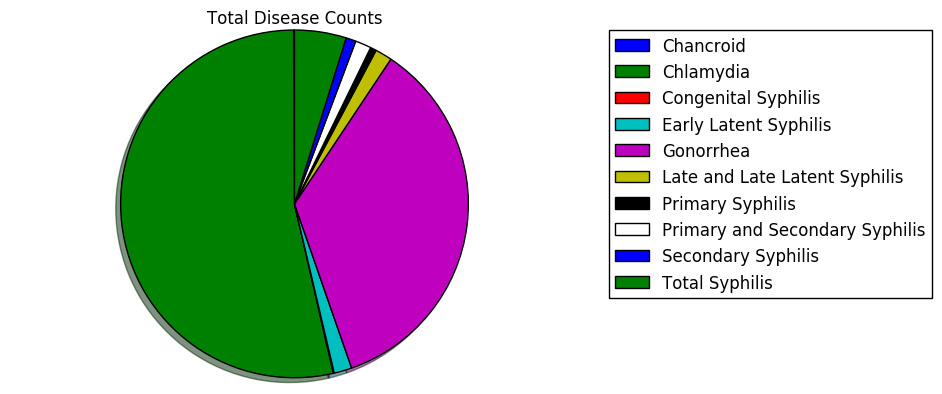

In [28]:
total_reported = diseases_c.Count.sum()

labels = diseases_c.Disease
sizes = (diseases_c.Count/total_reported) * 100

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.title("Total Disease Counts")
plt.tight_layout()
plt.show()

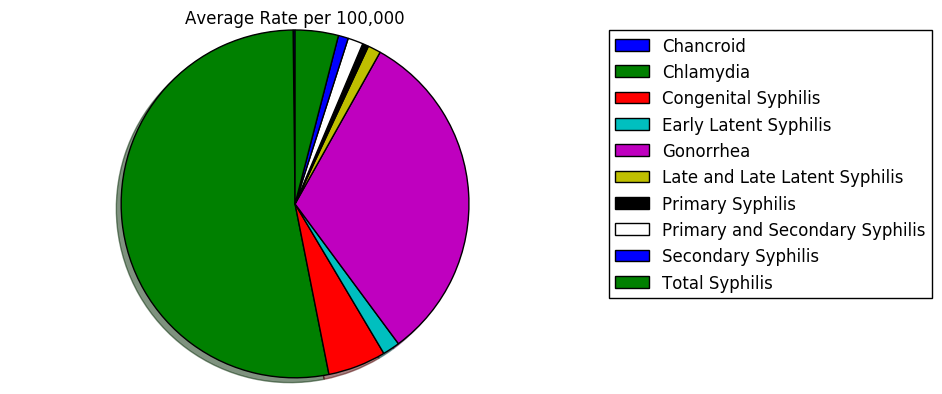

In [29]:
total_reported = diseases_r_mean.Rate.sum()

labels = diseases_r_mean.Disease
sizes = (diseases_r_mean.Rate/total_reported) * 100

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')
plt.title("Average Rate per 100,000")
plt.tight_layout()
plt.show()

In [30]:
for i, x in enumerate(labels):
    print("{}: {}%".format(x, sizes[i]))

Chancroid: 0.1763066633552493%
Chlamydia: 52.95076686271596%
Congenital Syphilis: 5.403255765831428%
Early Latent Syphilis: 1.6037636006108011%
Gonorrhea: 31.731754389075572%
Late and Late Latent Syphilis: 1.2037342972174194%
Primary Syphilis: 0.5684751111175035%
Primary and Secondary Syphilis: 1.4182064914797134%
Secondary Syphilis: 0.9277674951800832%
Total Syphilis: 4.015969323416267%


### Rate of Each Category of Disease Over Time

In [31]:
dr_time = data.groupby(["Disease", "Year"], as_index=False)["Rate"].mean()

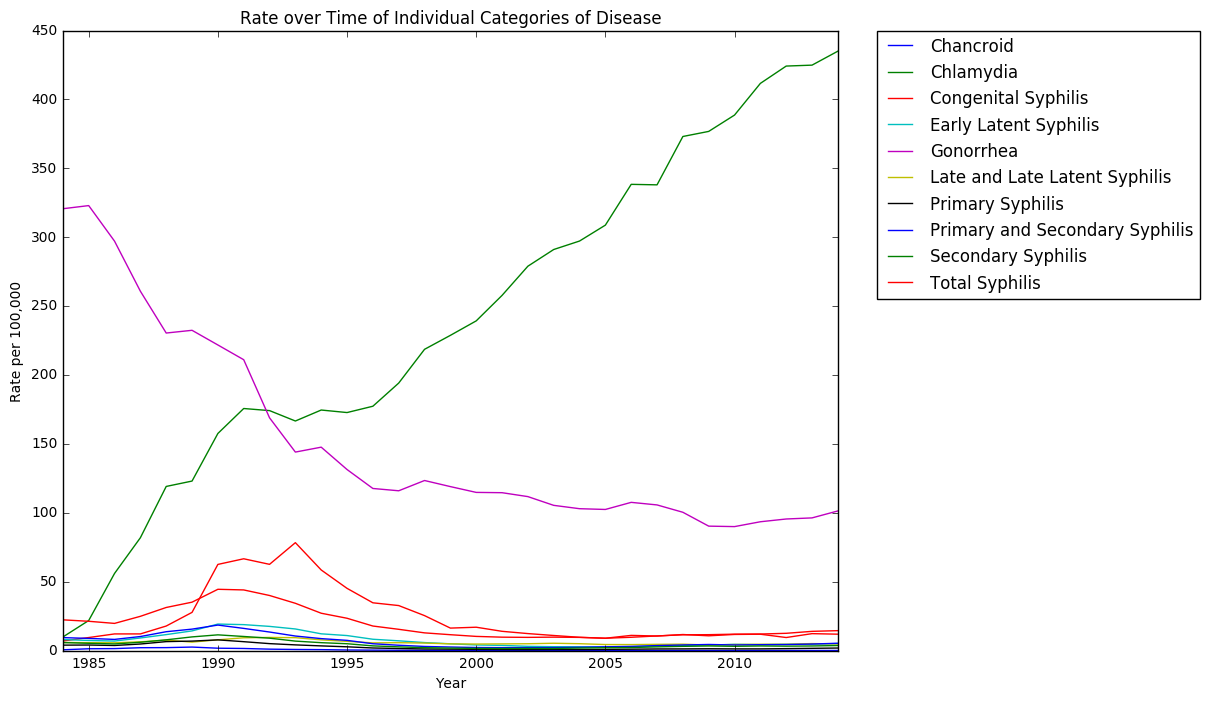

In [32]:
plt.figure(figsize=(10, 8))
for disease in dr_time.Disease.unique():
    plt.plot(dr_time.Year.unique(), dr_time[dr_time.Disease == disease].Rate, label=disease)

plt.title("Rate over Time of Individual Categories of Disease")
plt.xlabel("Year")
plt.xlim(1984, 2014)
plt.ylabel("Rate per 100,000")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Over time, it appears from this graph that most STD Reports are actually on the decline, with a strong exception of Chlamydia which appears to be growing at an alarming rate.

Notice the uptick in Chlamydia in the mid nineties.

### Linear Regression of Types of Diseases Reported over Time

for disease in dr_time.Disease.unique():
    r = LinearRegression()
    r.fit(dr_time.Year.unique().reshape(-1, 1), dr_time[dr_time.Disease == disease].Rate)
    plt.plot(dr_time.Year.unique(), r.predict(dr_time.Year.unique().reshape(-1,1)), label=disease)
    print("Slope of {}: {}".format(disease, r.coef_[0]))

plt.title("Linear Regression by Disease of Rates over Time")
plt.xlabel("Year")
plt.xlim(1984, 2014.1)
plt.ylabel("Rates of Reports per 100,000")
plt.ylim(0, 475)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the previous graphs it is apparent that STD's other than Chlamydia are all in a steady and fairly steep decline. 

However, Chlamydia is growing rapidly -- an increase of approximately 13 per 100,000 per year. This trend appears to have begun in 1995 or 1996. As I continue onto regional exploration, I' going to be exploring these dates.

## Looking at Region

### Examining at the state level